#**Dataset:**
E-commerce Customer Segmentation and Prediction Dataset

* Description: Contains comprehensive transaction records and customer behavior data from an e-commerce platform, covering customer purchases, product details, and geographical distribution to enable multi-dimensional customer analysis.
* Columns: Includes transaction details, product information, purchase quantities, timing, pricing, customer identifiers, and geographical data.
* Purpose: Used for advanced customer segmentation, predicting future purchase behavior, identifying high-value customers, and optimizing inventory management.
* Applications: RFM analysis (Recency, Frequency, Monetary), cohort analysis, product affinity analysis, seasonal trend detection, and personalized marketing campaigns.
* Analysis Tasks: Exploratory data analysis, customer clustering, purchase pattern mining, RFM analysis, and predictive modeling.
* Relevance: Essential dataset for modern e-commerce analytics, demonstrating real-world applications in customer relationship management, inventory optimization, and data-driven marketing strategies.

#**Step 1: Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#**Step 2: Loading the dataset**

In [2]:
Data = pd.read_csv('/content/E-commerce Customer Segmentation and Prediction.csv', encoding='iso-8859-1')

#**Step 3: Data Preprocessing & EDA**

In [3]:
Data.head()

,Invoice No,Stock Code,Description,Quantity,Invoice Date,Unit Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice No    541909 non-null  object 
 1   Stock Code    541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   Invoice Date  541909 non-null  object 
 5   Unit Price    541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
Data.describe()

,Quantity,Unit Price,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
Data.columns.values

array(['Invoice No', 'Stock Code', 'Description', 'Quantity',
       'Invoice Date', 'Unit Price', 'CustomerID', 'Country'],
      dtype=object)

In [7]:
# Checking for null values
Data.isnull().sum()

,0
Invoice No,0
Stock Code,0
Description,1454
Quantity,0
Invoice Date,0
Unit Price,0
CustomerID,135080
Country,0


In [8]:
# Handling missing values

# Fill missing values in the 'Description' column with 'Unknown'
Data['Description'] = Data['Description'].fillna('Unknown')

# Drop rows with missing 'CustomerID' since it's a critical identifier for segmentation
Data = Data.dropna(subset=['CustomerID'])

# Reset index after dropping rows
Data.reset_index(drop=True, inplace=True)

# Check for duplicates
print(f"Number of duplicate rows: {Data.duplicated().sum()}")

# Remove duplicate rows if any
Data = Data.drop_duplicates()

# Convert columns to appropriate data types
Data['Invoice Date'] = pd.to_datetime(Data['Invoice Date'], errors='coerce')  # Handle invalid date formats
Data['CustomerID'] = Data['CustomerID'].astype(int)
Data['Quantity'] = Data['Quantity'].astype(int)
Data['Unit Price'] = Data['Unit Price'].astype(float)

Number of duplicate rows: 5225


In [9]:
# Verify the cleaned data
print("\nCleaned Data Info:")
print(Data.info())
print("\nSample Data:")
print(Data.head())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice No    401604 non-null  object        
 1   Stock Code    401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   Invoice Date  401604 non-null  datetime64[ns]
 5   Unit Price    401604 non-null  float64       
 6   CustomerID    401604 non-null  int64         
 7   Country       401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB
None

Sample Data:
  Invoice No Stock Code                          Description  Quantity  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID 

In [10]:
# Save the cleaned data to a new CSV file
Data.to_csv('cleaned_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_data.csv'.")


Cleaned data saved to 'cleaned_data.csv'.


In [11]:
# Checking for null values
Data.isnull().sum()

,0
Invoice No,0
Stock Code,0
Description,0
Quantity,0
Invoice Date,0
Unit Price,0
CustomerID,0
Country,0


# **Top 10 Countries by Orders**

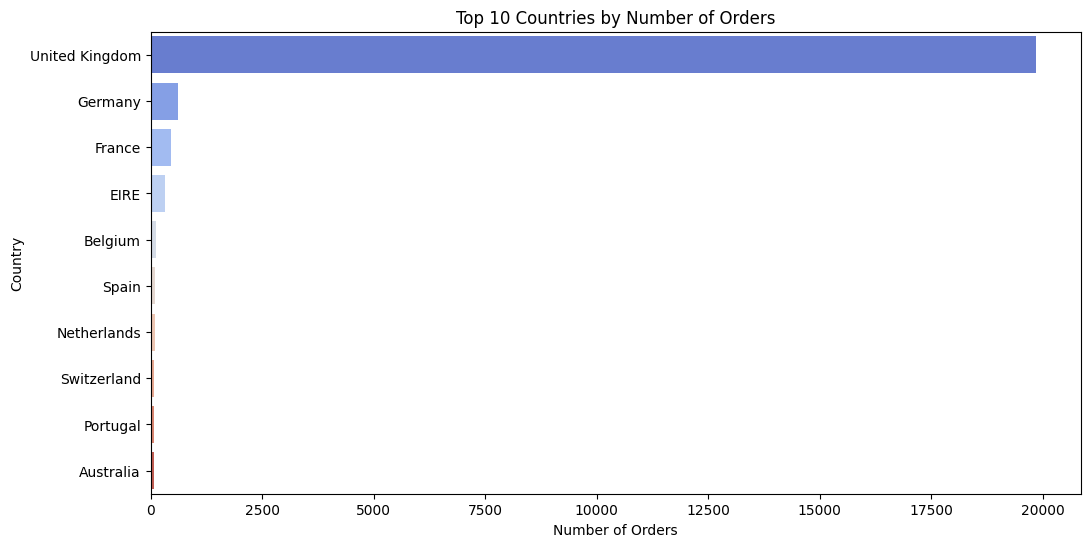

In [12]:
# Group the data by 'Country' and count the number of unique invoices (orders)
top_countries = Data.groupby('Country')['Invoice No'].nunique().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show()

* **This bar chart displays the top 10 countries with the highest number of orders.**
* **It helps identify the most active markets and potential regions for business expansion.**


# **Most Valuable Customers.**


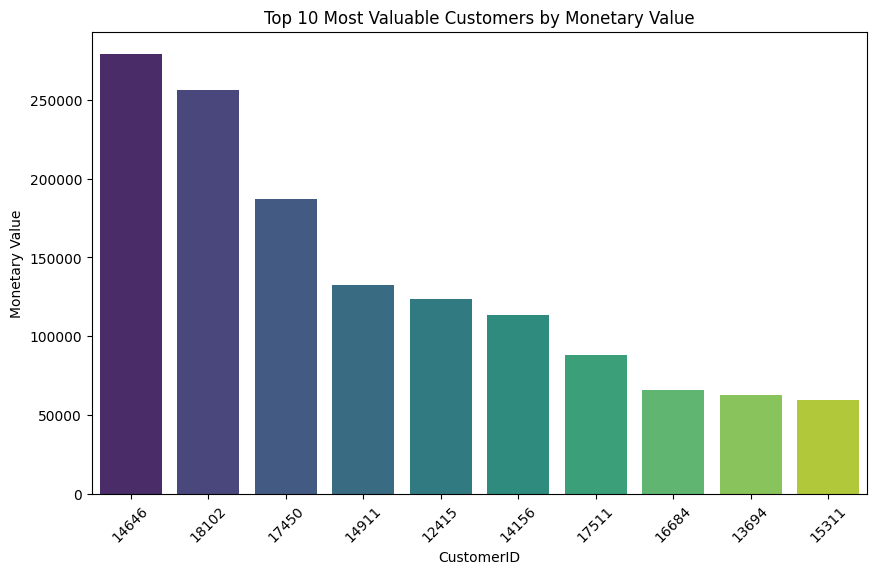

In [13]:
# Calculate RFM metrics
rfm_Data = Data.groupby('CustomerID').agg({
    'Invoice Date': lambda x: (Data['Invoice Date'].max() - x.max()).days,  # Recency
    'Invoice No': 'count',  # Frequency
    'Quantity': lambda x: (x * Data.loc[x.index, 'Unit Price']).sum()  # Monetary
}).rename(columns={'Invoice Date': 'Recency', 'Invoice No': 'Frequency', 'Quantity': 'Monetary'})

# Sort by Monetary value
top_customers = rfm_Data.sort_values('Monetary', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers['Monetary'], palette='viridis')
plt.title('Top 10 Most Valuable Customers by Monetary Value')
plt.xlabel('CustomerID')
plt.ylabel('Monetary Value')
plt.xticks(rotation=45)
plt.show()


* ###  This bar plot displays the top 10 most valuable customers based on their monetary value (total revenue generated).
* ### It helps identify high-value customers who contribute the most to the business's revenue.


# **Revenue Contribution: Top 10 Customers vs Others.**

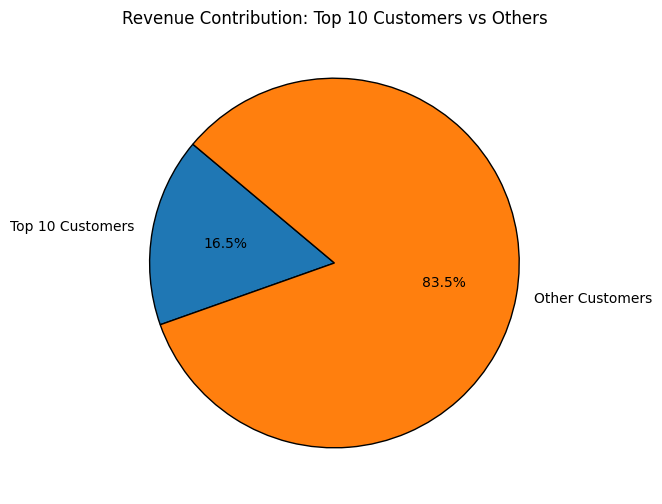

In [14]:
# Sorting customers by Monetary Value and selecting top 10
top_10_customers = rfm_Data.sort_values('Monetary', ascending=False).head(10)

# Total revenue from all customers
total_revenue = rfm_Data['Monetary'].sum()

# Revenue contribution of top 10 customers
top_10_revenue = top_10_customers['Monetary'].sum()

# Revenue contribution of remaining customers
other_revenue = total_revenue - top_10_revenue

# Pie chart labels and values
labels = ['Top 10 Customers', 'Other Customers']
sizes = [top_10_revenue, other_revenue]
colors = ['#1f77b4', '#ff7f0e']

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Revenue Contribution: Top 10 Customers vs Others')
plt.show()


* This pie chart visualizes the revenue contribution of the top 10 highest-spending customers compared to all other customers.
* The chart highlights that a small percentage of customers contribute a significant portion of total revenue.
* This insight suggests that retaining and nurturing these high-value customers is crucial for business growth.



# **Geographic Distribution of Customers**


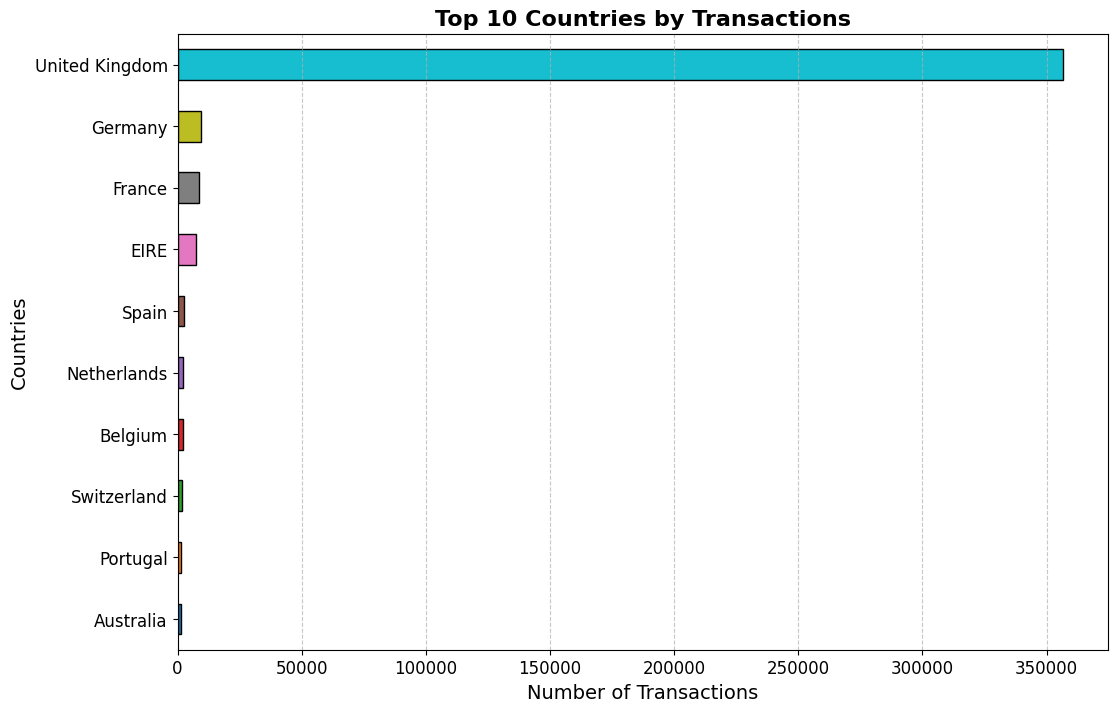

In [15]:
# Import the necessary module
import matplotlib.cm as cm

# Calculate country transaction counts (Assuming 'Country' column exists)
country_counts = Data['Country'].value_counts()

# Generate a colormap for the bars
colors = cm.get_cmap('tab10', len(country_counts[:10]))

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
country_counts[:10].sort_values().plot.barh(
    color=[colors(i) for i in range(len(country_counts[:10]))],  # Apply the colormap
    edgecolor='black'
)
plt.title('Top 10 Countries by Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Countries', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

* ### This horizontal bar chart illustrates the top 10 countries with the highest number of transactions, sorted in ascending order.
* ### It provides insights into the geographic distribution of the customer base, highlighting key markets to prioritize for strategic decisions.

# **Customer Churn Prediction (Feature Correlation)**




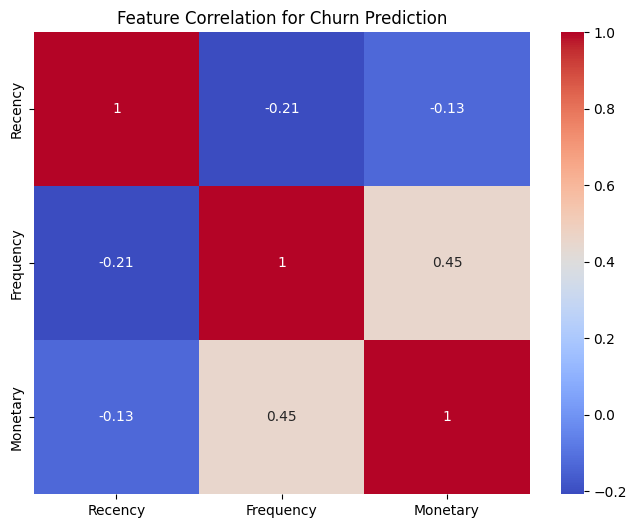

In [16]:
correlation_matrix = rfm_Data[['Recency', 'Frequency', 'Monetary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation for Churn Prediction')
plt.show()


* ###  This heatmap shows the correlation between RFM features (Recency, Frequency, and Monetary).
* ### It helps identify relationships between features and evaluate their potential use for churn prediction models.


# **Factors Influencing Purchase Amount**




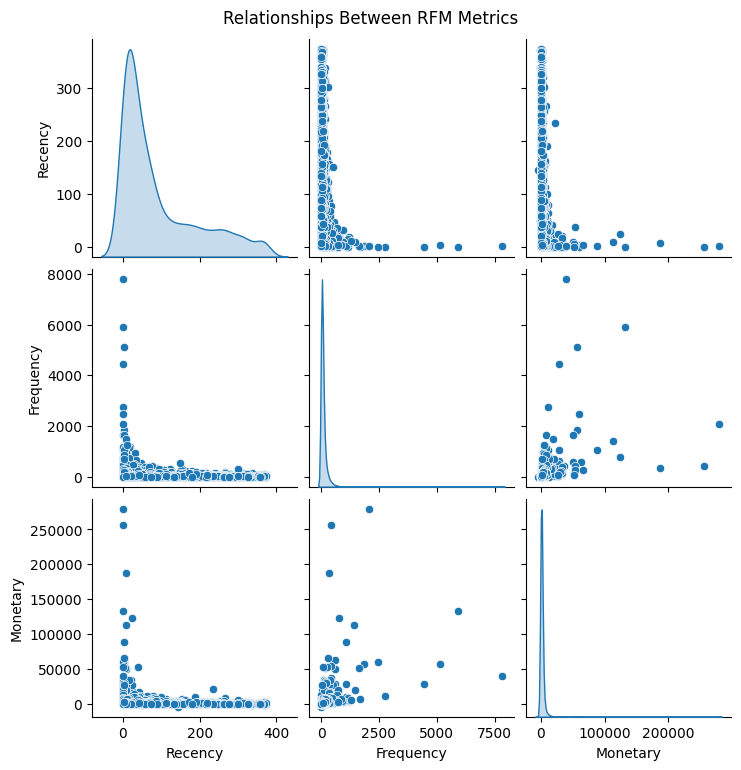

In [17]:
sns.pairplot(data=rfm_Data, diag_kind='kde') # Change rfm_data to rfm_Data
plt.suptitle('Relationships Between RFM Metrics', y=1.02)
plt.show()

* ###  This pairplot visualizes the relationships between RFM metrics (Recency, Frequency, Monetary).
* ### It helps identify trends and correlations that influence customer purchasing behavior.

# **Seasonal Trends in Sales**


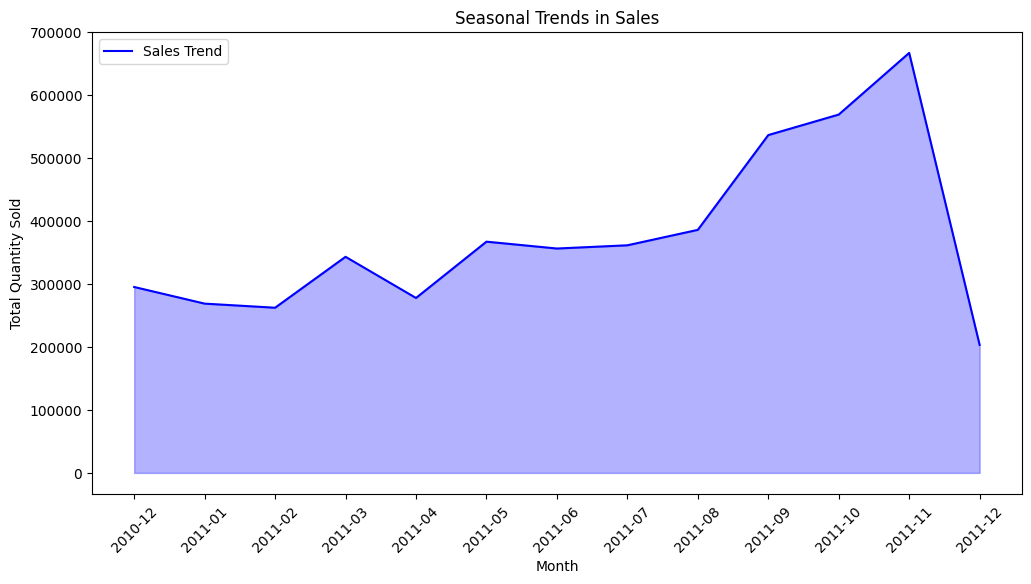

In [18]:
Data['Month'] = Data['Invoice Date'].dt.to_period('M')
monthly_sales = Data.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12, 6))
# Convert the index to strings for plotting
plt.plot(monthly_sales.index.astype(str), monthly_sales, label='Sales Trend', color='blue')
plt.fill_between(monthly_sales.index.astype(str), monthly_sales, color='blue', alpha=0.3)  # Fill area under the curve
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

* ### This line chart represents the total quantity of items sold each month over time.
* ###  It reveals seasonal patterns and trends in customer purchasing behavior, useful for demand forecasting.

# **Top-Selling Products**


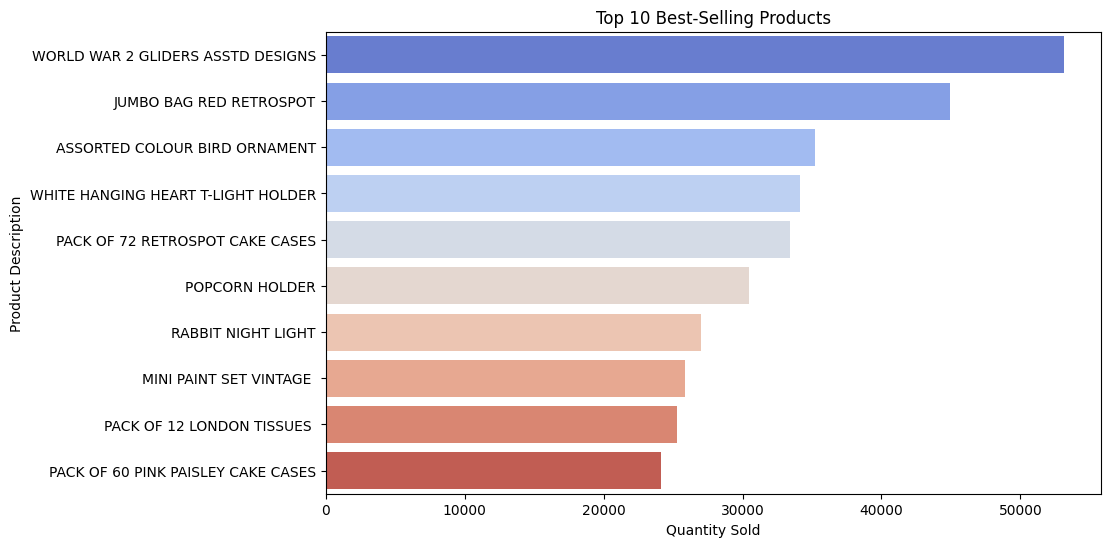

In [19]:
top_products = Data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()


* ### This horizontal bar chart showcases the top 10 best-selling products by quantity.
* ### It identifies the most popular items, which are key to inventory and marketing decisions.

# **The most returned products?**

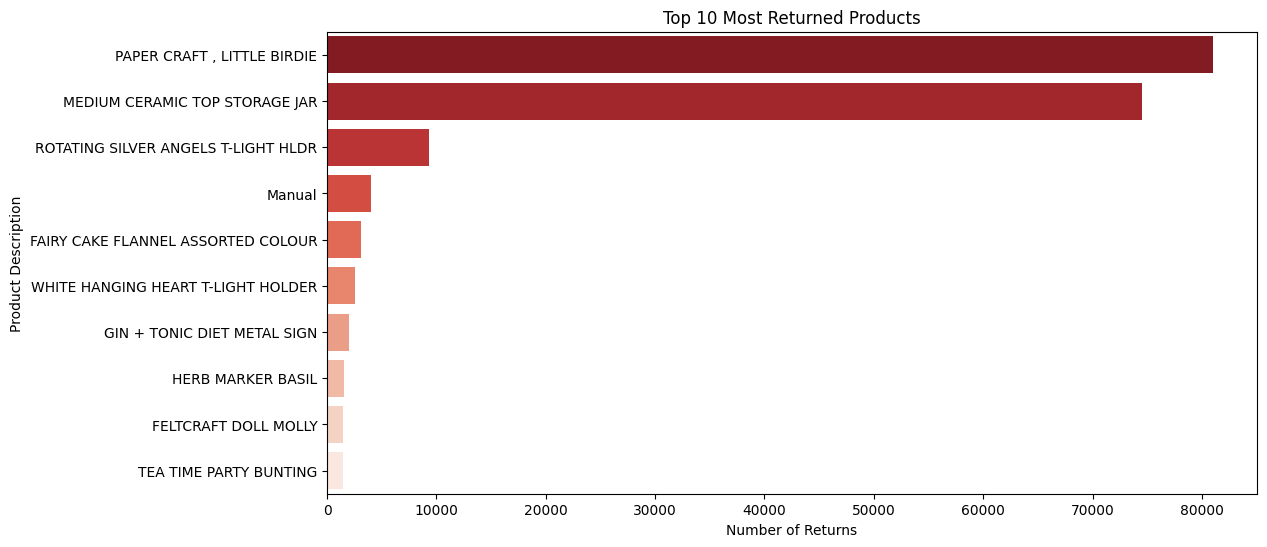

In [20]:
returned_products = Data[Data['Quantity'] < 0].groupby('Description')['Quantity'].sum().abs()
top_returned_products = returned_products.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_returned_products.index, x=top_returned_products.values, palette='Reds_r')
plt.title('Top 10 Most Returned Products')
plt.xlabel('Number of Returns')
plt.ylabel('Product Description')
plt.show()

* This horizontal bar chart displays the top 10 most returned products.
* It helps in identifying problematic items that might need quality control or better descriptions.


# **Revenue Contribution by Products**



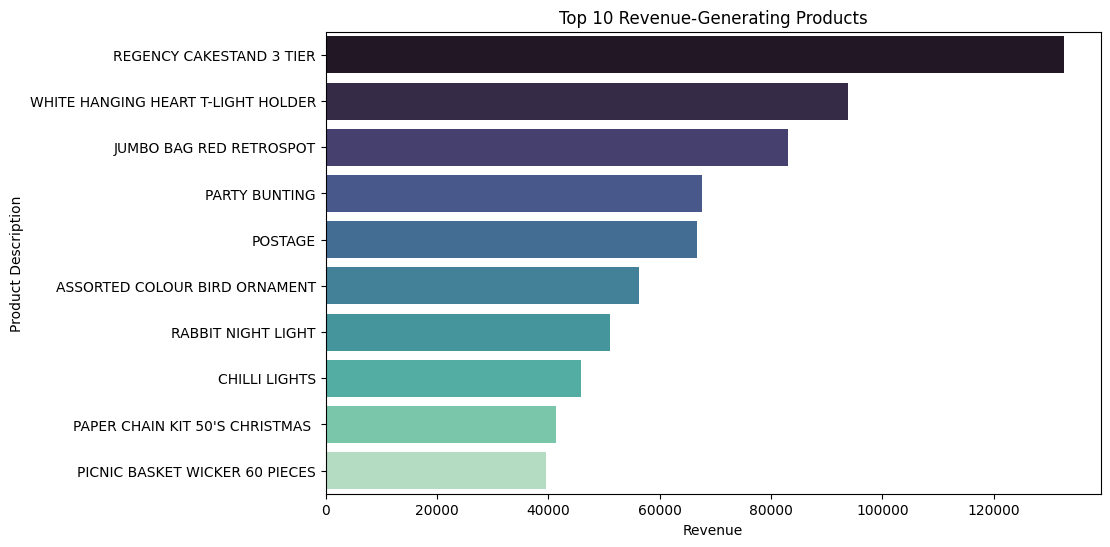

In [21]:
Data['Revenue'] = Data['Quantity'] * Data['Unit Price']
top_revenue_products = Data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_revenue_products.index, x=top_revenue_products.values, palette='mako')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.show()


* ### This bar chart displays the top 10 products generating the highest revenue.
* ### It highlights items that contribute most to the business's profitability.

# **Which customers have the highest purchase frequency?**



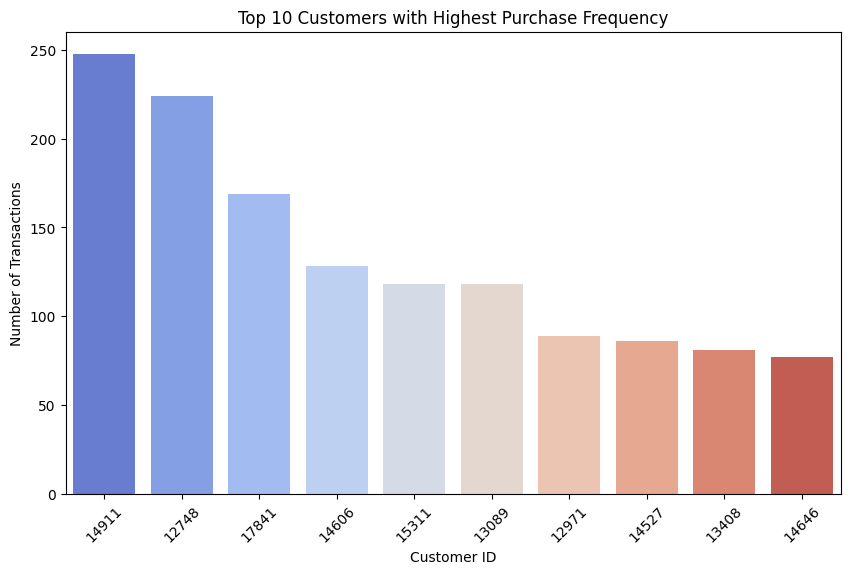

In [22]:
# Calculate purchase frequency
customer_frequency = Data.groupby('CustomerID')['Invoice No'].nunique().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_frequency.index.astype(str), y=customer_frequency.values, palette='coolwarm')
plt.title('Top 10 Customers with Highest Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


* ### This bar plot identifies the top 10 customers who made the highest number of transactions.
* ### Understanding frequent buyers can help in loyalty programs and targeted marketing.



# **How does revenue fluctuate throughout the day?**


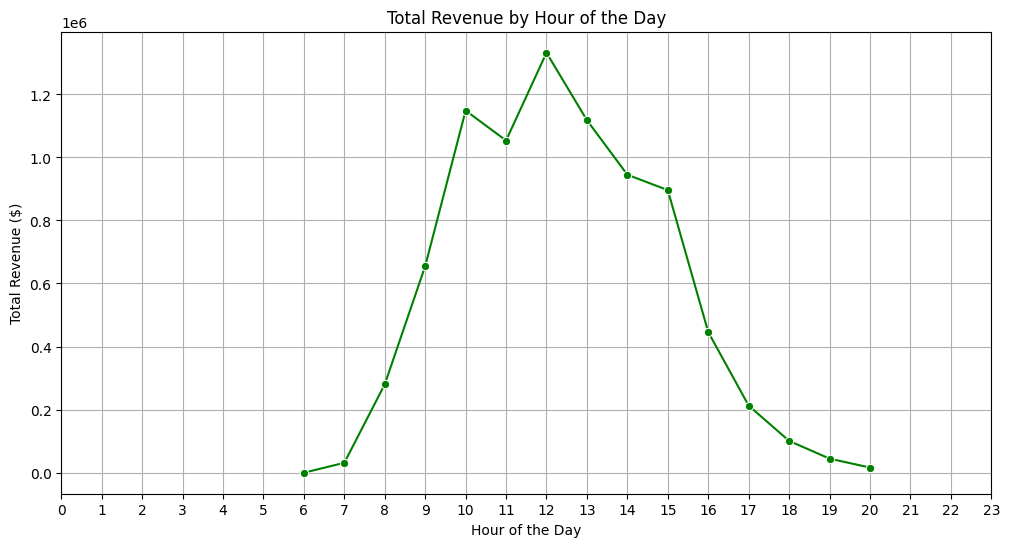

In [23]:
# Extract hour from InvoiceDate
Data['Hour'] = Data['Invoice Date'].dt.hour

# Calculate OrderValue if it doesn't exist
Data['OrderValue'] = Data['Quantity'] * Data['Unit Price']

# Calculate total revenue per hour
hourly_revenue = Data.groupby('Hour')['OrderValue'].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o', color='green')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

* ### This line plot examines how total revenue varies across different hours of the day.
* ### It helps in identifying peak sales hours and planning marketing strategies accordingly.


# **Which days of the week generate the most revenue?**



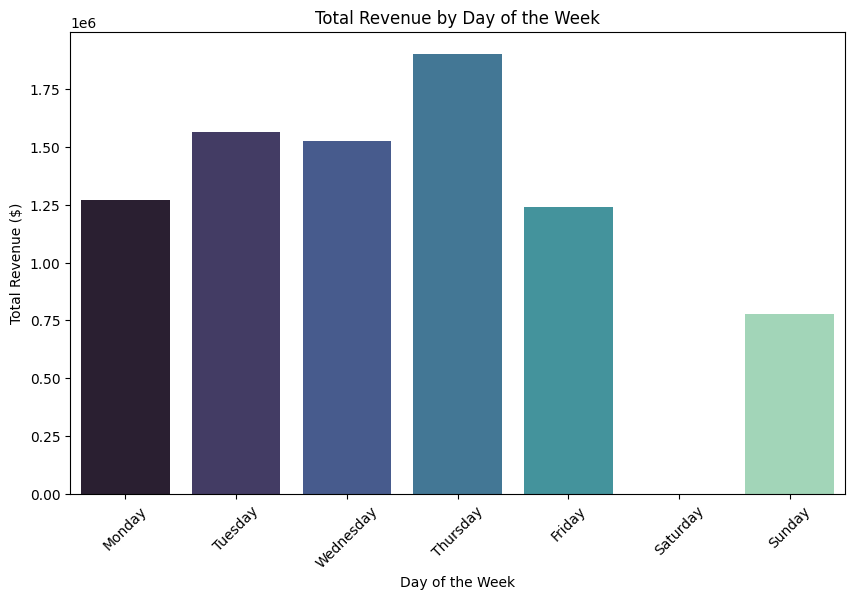

In [24]:
# Extract day of the week from Invoice Date and create a new column
Data['Day Of Week'] = Data['Invoice Date'].dt.day_name()

# Calculate total revenue per day
daywise_revenue = Data.groupby('Day Of Week')['OrderValue'].sum()

# Reorder days for correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_revenue = daywise_revenue.reindex(ordered_days)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=daywise_revenue.index, y=daywise_revenue.values, palette='mako')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

* ### This bar plot visualizes total revenue for each day of the week.
* ### It helps in understanding customer shopping patterns and planning promotions.

# **Step 4: Predictive modeling - ML Algorithms**


---

Developing

* Logistic Regression,
* Confusion Matrix,
* K-Means clustering,
* Hierarchical clustering,
* DBSCAN(Density-Based Spatial Clustering of Application with Noise)

## **Data Preparation**

In [25]:
# Remove negative monetary values (returns)
rfm = rfm_Data[rfm_Data['Monetary'] > 0]

# Define the Target Variable: High-Value (1) vs. Low-Value Customers (0)
threshold = rfm['Monetary'].median()  # Using median spending as threshold
rfm['Customer_Class'] = (rfm['Monetary'] > threshold).astype(int)  # 1 for High-Value, 0 for Low-Value

# Features and Target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Customer_Class']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **1. Logistic Regression Model**

In [26]:
# Train Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.3f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.913
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       420
           1       0.98      0.85      0.91       444

    accuracy                           0.91       864
   macro avg       0.92      0.92      0.91       864
weighted avg       0.92      0.91      0.91       864



**Observation**
* With Logistic Regression Model, the accuracy is increased to upto 91%.

# **2. Confusion Matrix**

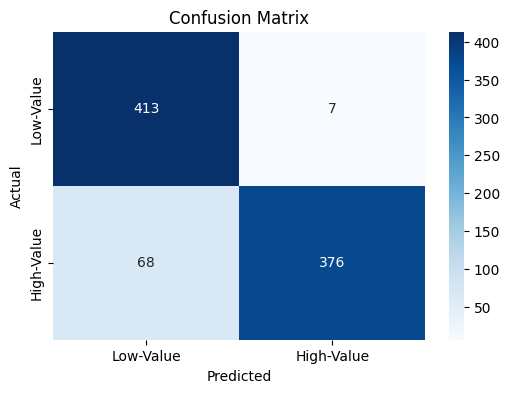

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Low-Value", "High-Value"], yticklabels=["Low-Value", "High-Value"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## **Confusion Matrix Analysis:**
 ----------------------------------
#### - True Positives (TP): Correctly predicted High-Value customers.
#### - True Negatives (TN): Correctly predicted Low-Value customers.
#### - False Positives (FP): Misclassified Low-Value customers as High-Value.
#### - False Negatives (FN): Misclassified High-Value customers as Low-Value.
#### - A high TP and TN indicate good model performance.
#### - A lower FP and FN mean better customer targeting and fewer misclassifications.
#### - Overall, this matrix helps evaluate the accuracy of our customer prediction model.



# **3. K-Means Clustering**

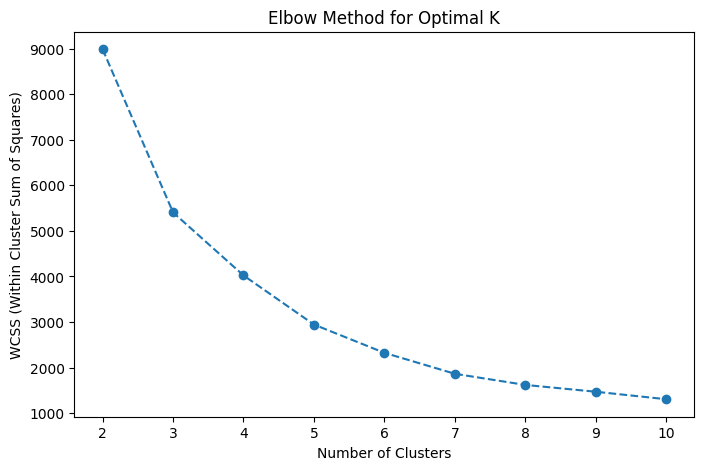

In [28]:
# Standardize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_Data)

# Determine optimal K using Elbow Method
wcss = []
for k in range(2, 11):  # Testing k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

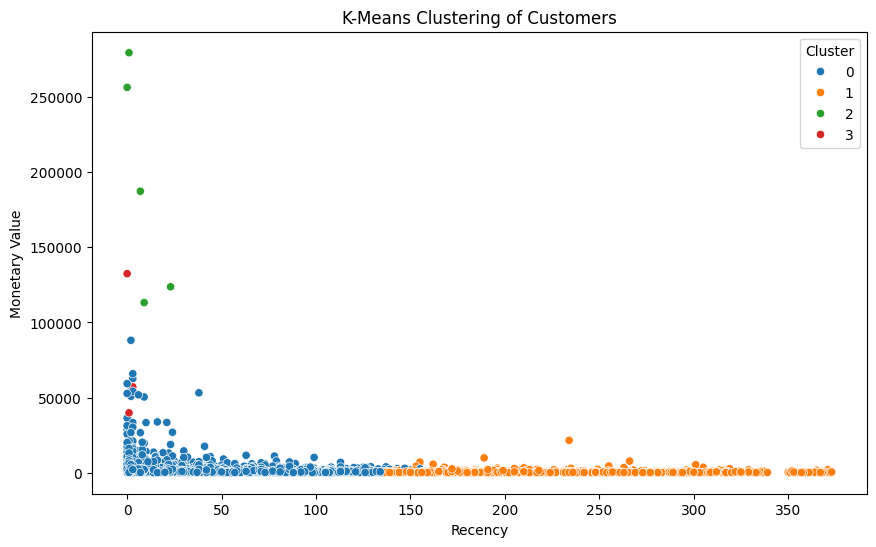

In [29]:
# Apply K-Means with optimal K
optimal_k = 4  # Choose based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Scale the rfm DataFrame instead of using rfm_scaled
rfm_scaled_filtered = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled_filtered)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['KMeans_Cluster'], palette='tab10')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

In [30]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_Data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

# Evaluate the clustering model
silhouette_kmeans = silhouette_score(rfm_scaled, rfm_Data['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.3f}")

Silhouette Score for K-Means: 0.598


**Observation**
* Wth Silhouette Score for K-Means, the accuracy is increased to upto 60%.

# **4. Hierarchical Clustering**

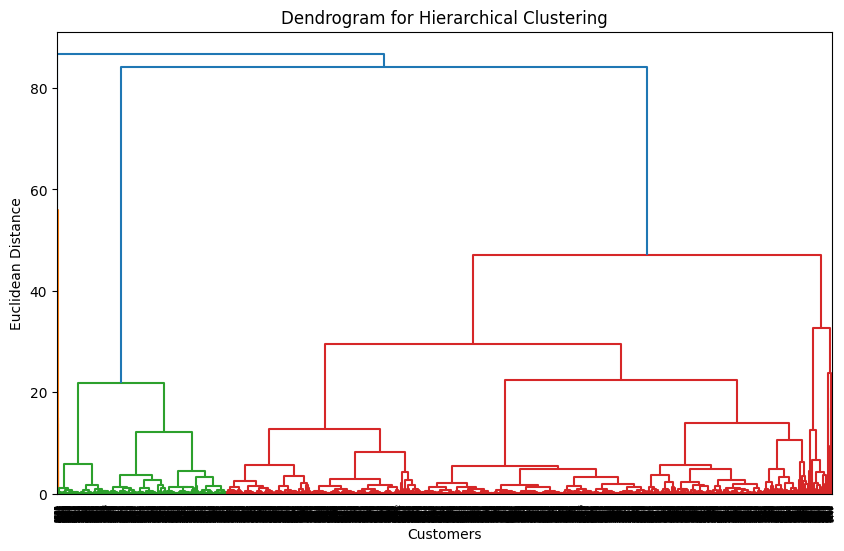

In [31]:
# Plot Dendrogram to determine optimal number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

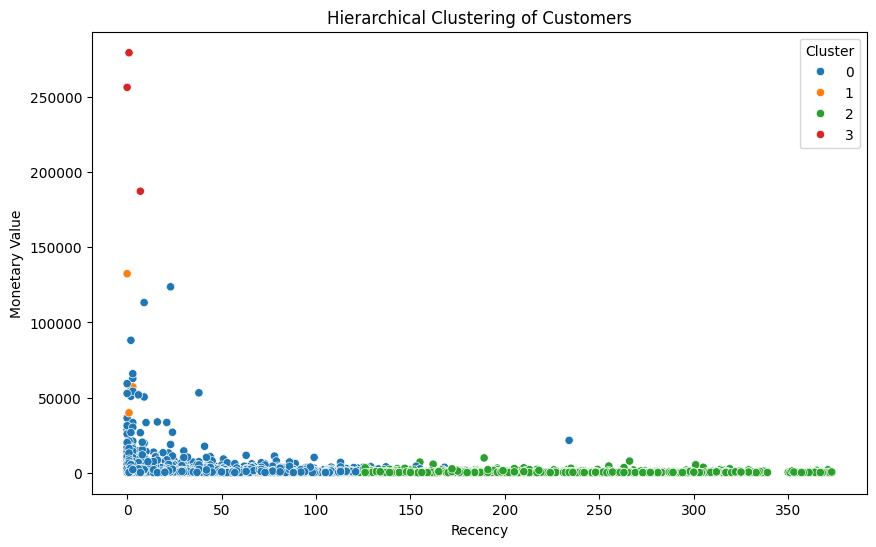

In [32]:
# Apply Hierarchical Clustering with chosen number of clusters
optimal_clusters = 4  # Select based on dendrogram
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')

# Use the scaled features derived from the 'rfm' DataFrame
rfm_scaled_filtered = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm['Hierarchical_Cluster'] = hc.fit_predict(rfm_scaled_filtered)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Hierarchical_Cluster'], palette='tab10')
plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

In [33]:
# Evaluate the clustering model
silhouette_hc = silhouette_score(rfm_scaled_filtered, rfm['Hierarchical_Cluster'])  # Use rfm_scaled_filtered for evaluation
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hc:.3f}")

Silhouette Score for Hierarchical Clustering: 0.587


**Observation**
* Wth Silhouette Score for Hierarchical Clustering, the accuracy is increased to upto 53%.

# **5. DBSCAN (Density-Based Clustering)**

In [34]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters based on dataset

# Scale the relevant columns from the 'rfm' DataFrame
rfm_scaled_filtered = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply DBSCAN to the scaled filtered data
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled_filtered)

# Count number of clusters (excluding noise)
num_clusters = len(set(rfm['DBSCAN_Cluster'])) - (1 if -1 in rfm['DBSCAN_Cluster'] else 0)
print(f"Number of DBSCAN Clusters: {num_clusters}")

Number of DBSCAN Clusters: 3


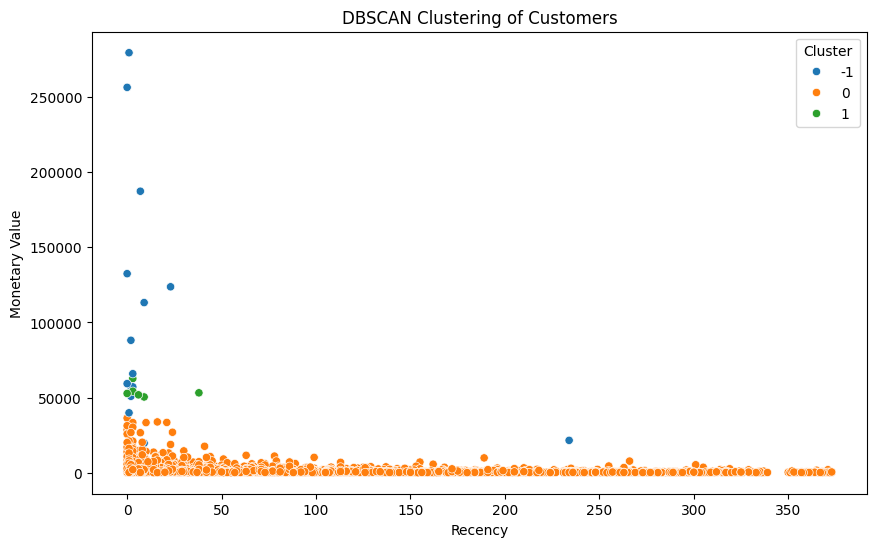

In [35]:
# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

In [36]:
# Evaluate the clustering model (excluding noise points)
rfm_dbscan_filtered = rfm[rfm['DBSCAN_Cluster'] != -1]  # Remove noise points (-1)
if not rfm_dbscan_filtered.empty:
    # Check if there are at least 2 unique clusters
    n_clusters = len(set(rfm_dbscan_filtered['DBSCAN_Cluster']))
    if n_clusters >= 2:
        # Scale the data used for DBSCAN filtering
        rfm_scaled_filtered = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

        # Select the scaled data corresponding to the filtered data
        # Use boolean indexing to select rows based on the presence of indices in rfm_dbscan_filtered
        rfm_scaled_dbscan_filtered = rfm_scaled_filtered[rfm.index.isin(rfm_dbscan_filtered.index)]
        # Calculate the Silhouette Score using the filtered data
        silhouette_dbscan = silhouette_score(rfm_scaled_dbscan_filtered, rfm_dbscan_filtered['DBSCAN_Cluster'])
        print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}")
    else:
        print("DBSCAN produced less than 2 clusters, silhouette score cannot be calculated.")
else:
    print("DBSCAN produced only noise points, no clusters found.")

Silhouette Score for DBSCAN: 0.800


In [37]:
# Compare Silhouette Scores
print("Clustering Model Performance:")
print(f"K-Means Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hc:.3f}")
# Check if silhouette_dbscan is defined before printing
if 'silhouette_dbscan' in locals():  # Check if silhouette_dbscan is defined
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.3f}")
else:
    print("DBSCAN did not form clear clusters (silhouette score not calculated).")

Clustering Model Performance:
K-Means Silhouette Score: 0.598
Hierarchical Clustering Silhouette Score: 0.587
DBSCAN Silhouette Score: 0.800


**Conclusion:**
 - Choose the model with the highest Silhouette Score.
 - K-Means is usually preferred for customer segmentation due to its efficiency and scalability.
 - Hierarchical clustering helps in understanding cluster relationships but is computationally expensive.
 - DBSCAN is good for detecting anomalies (outliers) in customer data.